## Лабоораторная работа №4

### 1. Был взят 1  набор данных по своему варианту для проведения анализа согласно цели выполняемой работы.

In [49]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
data = pd.read_csv('1heart.csv')


Мною был выбран первый вариант, где датасет содержит информацию о сердечных болезнях. При помощи data.head и data.info выведем инфорамицию о датасете и его содержании, проанализируем, и в случае каких-либо ошибок исправим. 

In [2]:
print(data)

     Age Sex ChestPainType  RestingBP Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0         289          0     Normal   
1     49   F           NAP      160.0         180          0     Normal   
2     37   M           ATA      130.0         283          0         ST   
3     48   F           ASY      138.0         214          0     Normal   
4     54   M           NAP      150.0         195          0     Normal   
..   ...  ..           ...        ...         ...        ...        ...   
920   38   M           NAP      138.0         175          0     Normal   
921   38   M           NAP      138.0         175          0        NaN   
922   57   F           ASY      140.0        a241          0     Normal   
923   55   F           ATA      132.0         342          0     Normal   
924   56  Ma           ATA      130.0         221          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172.0              N      0.0     

In [3]:
data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


1. Возраст
2. Пол
3. Тип боли в груди (4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])
4. Артериальное давление в покое
5. Холестерин сыворотки в мг/дл
6. Уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое норма: нормальная, ST: аномалия ST-T LVN: гипертрофия
8. MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
9. Стенокардия, вызванная физической нагрузкой (да, нет)
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя 
11. Наклон пикового сегмента ST при нагрузке (Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12. HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный] 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Проанализировав типы данных столбцов и названия, мы можем прийти к выводу, что тип столбца Cholesterol можно поменять на int для дальнейшей работы с данными. 

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### 2. Провести предварительную обработку данных (как в 1 ЛР).

Для начала выявим имеет ли датасет NaN значения в ячейках. 

In [6]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Видим, что в столбцах RestingBP, Cholesterol, RestingECG, MaxHR имеют несколько значенй Nan. Менять пустые значения на нули я считаю нерационально, хоть и значений с нулями в столбцах по сравнению с обим количеством данных мало и вряд ли это повлияет на общую статстику, но все же я предпочту удалить данные строки с пустыми значениями в ячейках. 

In [7]:
data = data.dropna(subset=['RestingBP','Cholesterol','RestingECG','MaxHR',])

In [8]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Наглядно видим, что теперь в датасете осутствуют ячейки с пустыми значениями. Далле сменим тип стоблца Cholesterol на int и выведем datа.info, чтобы убедиться успешном изменении. 

In [50]:
data.replace(to_replace="a241",value= 241, inplace=True)

In [10]:
data['Cholesterol'] = data['Cholesterol'].astype(str).astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             921 non-null    int64  
 1   Sex             921 non-null    object 
 2   ChestPainType   921 non-null    object 
 3   RestingBP       921 non-null    float64
 4   Cholesterol     921 non-null    int32  
 5   FastingBS       921 non-null    int64  
 6   RestingECG      921 non-null    object 
 7   MaxHR           921 non-null    float64
 8   ExerciseAngina  921 non-null    object 
 9   Oldpeak         921 non-null    float64
 10  ST_Slope        921 non-null    object 
 11  HeartDisease    921 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 89.9+ KB


Тип успешно был изменен и можно дальше обработать данные для правильного анализа данных датасета

In [12]:
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0          289          0     Normal   
1     49   F           NAP      160.0          180          0     Normal   
2     37   M           ATA      130.0          283          0         ST   
3     48   F           ASY      138.0          214          0     Normal   
4     54   M           NAP      150.0          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
918   38   M           NAP      138.0          175          0     Normal   
919   38   M           NAP      138.0          175          0     Normal   
920   38   M           NAP      138.0          175          0     Normal   
922   57   F           ASY      140.0          241          0     Normal   
924   56  Ma           ATA      130.0          221          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172.0              N  

Далее проверим датасет на наличие дубликатов.

In [13]:
print(data.duplicated().sum())

4


В датасете нашлось 4 дубликата, которые следует удалить 

In [14]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


Удаление дублкатов произошло успешно и наглядно видим, что количество дубликатов равно нулю.

________________________________________________________________________________________________________________________________________________

Проверим датасет на наличие неявных дубликатов.

In [15]:
print(data['Sex'].unique())

['M' 'F' 'Ma']


In [16]:
tableex = data.groupby(["Sex"])["Sex"].count()
print(tableex)

Sex
F     192
M     724
Ma      1
Name: Sex, dtype: int64


Долго сомневался нужно ли гендер Ма перенести в М, но в итоге решил именно так поступить.

In [17]:
data['Sex'] = data['Sex'].replace('Ma', 'M')

In [18]:
tableex = data.groupby(["Sex"])["Sex"].count()
print(tableex)

Sex
F    192
M    725
Name: Sex, dtype: int64


In [19]:
print(data['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


In [20]:
print(data['RestingECG'].unique())

['Normal' 'ST' 'LVH']


In [21]:
tableex2 = data.groupby(["RestingECG"])["RestingECG"].count()
print(tableex2)

RestingECG
LVH       189
Normal    550
ST        178
Name: RestingECG, dtype: int64


In [22]:
print(data['ExerciseAngina'].unique())

['N' 'Y']


In [23]:
print(data['ST_Slope'].unique())

['Up' 'Flat' 'Down' 'UP']


In [24]:
tableex3 = data.groupby(["ST_Slope"])["ST_Slope"].count()
print(tableex3)

ST_Slope
Down     63
Flat    460
UP        1
Up      393
Name: ST_Slope, dtype: int64


Тут мы видим, что есть одно значение в ячейке, которое зааписано капсом и это нужно исправить.

In [25]:
data['ST_Slope'] = data['ST_Slope'].replace('UP', 'Up')

In [26]:
tableex3 = data.groupby(["ST_Slope"])["ST_Slope"].count()
print(tableex3)

ST_Slope
Down     63
Flat    460
Up      394
Name: ST_Slope, dtype: int64


Наглядно видноо, что замена значения произоша успешно и неявный дубликат устранен.

In [27]:
print(data['HeartDisease'].unique())

[0 1]


Больше неявных дубликатов в датасете не содержится и можно сделать вывод, что датасет готов к дальнейшей работе. 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    int32  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 89.6+ KB


In [29]:
# Команда, позволяющая удалить столбца. которые не содеражат количественных признаков, 
# а так же уберем целевой столбец 
clust = data.drop(data.columns[[1,2,6,8,10]], axis=1)
#Выведем часть данных
clust.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289,0,172.0,0.0,0
1,49,160.0,180,0,156.0,1.0,1
2,37,130.0,283,0,98.0,0.0,0
3,48,138.0,214,0,108.0,1.5,1
4,54,150.0,195,0,122.0,0.0,0
5,39,120.0,339,0,170.0,0.0,0
6,45,130.0,237,0,170.0,0.0,0
7,54,110.0,208,0,142.0,0.0,0
8,37,140.0,207,0,130.0,1.5,1
9,48,120.0,284,0,120.0,0.0,0


## Разделение датасета на тренировочный и тестовый

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(clust,clust['HeartDisease'], train_size=0.75)
x_train = x_train.drop(['HeartDisease'], axis=1)
x_test = x_test.drop(['HeartDisease'], axis=1)

## Разработка предсказательной модели качественного отклика методами:
- метод k- ближайших соседей
- логистическая регрессия
- случайный лес.
## Метод k-ближайших соседей
Обучение модели K-ближайших соседей 

Начнем с импорта KNeighborsClassifier из scikit-learn:

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model_k = KNeighborsClassifier()

In [33]:
model_k.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
k_pred = model_k.predict(x_test)

Далее оценим качество моделей спомощью метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'.
- Accuracy - это доля правильных ответов.
- Precision - доля правильных ответов только среди целевого класса.
- Recall - сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели.
- Balanced accuracy - среднее чувствительности (Sensitivity) и специфичности (Specificity)(процент правильно классифицируемых объектов одного из класса)
- f1 score - метрика, учитывающая баланс между метриками. F-мера является мерой точности теста.

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [36]:
accuracy = round(accuracy_score(y_test, k_pred),3)
print('Accuracy= ', accuracy)
precision = round(precision_score(y_test, k_pred),3)
print('Precision=  ', precision)
recall = round(recall_score(y_test, k_pred),3)
print('Recall= ', recall)
bal_acc = round(balanced_accuracy_score(y_test, k_pred),3)
print('Balanced_accuracy= ', bal_acc)
f1 = round(f1_score(y_test, k_pred),3)
print('f1= ', f1)

Accuracy=  0.687
Precision=   0.667
Recall=  0.769
Balanced_accuracy=  0.686
f1=  0.714


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, k_pred))

[[68 45]
 [27 90]]


На основе полученных данных можно сделать вывод, что модель часто ошибалась.

## Логистическая регрессия
Начнем с импорта LogisticRegression из scikit-learn. а затем создадим экземпляр класса LogisticRegression и назначим его переменной logmodel.

In [38]:
from sklearn.linear_model import LogisticRegression
# обучаем модель
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
# получаем предказания
log_predict = logmodel.predict(x_test)

Далее также оценим качество обученной модели с помощью метрик.


In [39]:
acc = round(accuracy_score(y_test, log_predict), 3)
print('Accuracy= ', accuracy)
precision = round(precision_score(y_test, log_predict), 3)
print('Precision=  ', precision)
recall = round(recall_score(y_test, log_predict), 3)
print('Recall= ', recall)
bal_acc = round(balanced_accuracy_score(y_test, log_predict), 3)
print('Balanced_accuracy= ', bal_acc)
f1 = round(f1_score(y_test, log_predict), 3)
print('f1= ', f1)

Accuracy=  0.687
Precision=   0.645
Recall=  0.778
Balanced_accuracy=  0.668
f1=  0.705


In [40]:
print(confusion_matrix(y_test, log_predict))

[[63 50]
 [26 91]]


На основе полученных данных можно сделать вывод, что результаты все еще не очень хорошие и, сравнивая с предыдущей моделью, показатели лишь немного улучшились. Истинно положительные результаты определяются лучше, а отрицательно положительные уменьшились, что говрит о большей точности.

## Случайный лес

In [41]:
from sklearn.ensemble import RandomForestClassifier

fmodel = RandomForestClassifier()
fmodel.fit(x_train, y_train)
f_predict = fmodel.predict(x_test)

In [42]:
acc = round(accuracy_score(y_test, f_predict), 3)
print('Accuracy= ', acc)
precision = round(precision_score(y_test, f_predict), 3)
print('Precision=  ', precision)
recall = round(recall_score(y_test, f_predict), 3)
print('Recall= ', recall)
bal_acc = round(balanced_accuracy_score(y_test, f_predict), 3)
print('Balanced accuracy= ', bal_acc)
f1 = round(f1_score(y_test, f_predict), 3)
print('f1= ', f1)

Accuracy=  0.752
Precision=   0.731
Recall=  0.812
Balanced accuracy=  0.751
f1=  0.769


In [43]:
print(confusion_matrix(y_test, f_predict))

[[78 35]
 [22 95]]


Результаты матрицы и метрик показывают нам схожие с предыдущей моделью результаты, но определение истинно положительных значений немного лучше. 

На основе плученных данных всех трех моделей можнно сделать вывод, что наибольшая точность показателей у модели случайный лес.

## ROC-кривая 

KNeighborsClassifier: ROC AUC=0.741
LogisticRegression: ROC AUC=0.801
RandomForestClassifier: ROC AUC=0.810


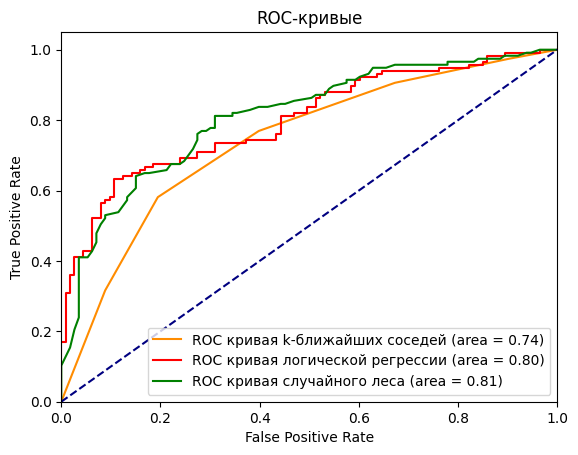

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

#k-ближайших соседей

lr_probs_k = model_k.predict_proba(x_test) # получаем предказания
lr_probs_k = lr_probs_k[:, 1] # сохраняем вероятности только для положительного исхода
lr_auc_k = roc_auc_score(y_test, lr_probs_k) # рассчитываем ROC AUC
print('KNeighborsClassifier: ROC AUC=%.3f' % (lr_auc_k))
fpr, tpr, treshold = roc_curve(y_test, lr_probs_k) # рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая k-ближайших соседей (area = %0.2f)' % roc_auc)

#логическая регрессия

lr_probs_log = logmodel.predict_proba(x_test) # получаем предказания
lr_probs_log = lr_probs_log[:, 1] # сохраняем вероятности только для положительного исхода
lr_auc_log = roc_auc_score(y_test, lr_probs_log) # рассчитываем ROC AUC
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc_log))
fpr, tpr, treshold = roc_curve(y_test, lr_probs_log) # рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         label='ROC кривая логической регрессии (area = %0.2f)' % roc_auc) # строим график


# Случайный лес


lr_probs_f = fmodel.predict_proba(x_test) # получаем предказания
lr_probs_f = lr_probs_f[:, 1] # сохраняем вероятности только для положительного исхода
lr_auc_f = roc_auc_score(y_test, lr_probs_f) # рассчитываем ROC AUC
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc_f))
fpr, tpr, treshold = roc_curve(y_test, lr_probs_f) # рассчитываем roc-кривую
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green',
         label='ROC кривая случайного леса (area = %0.2f)' % roc_auc) # строим график



plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

Рассмотрев полученные roc-кривые можно сказать, трудно определить превосходство модели случайного леса и модели логической регрессии, так как их показатели близки к одинаковым.

## Выводы 

Подводя итоги, можно сказать, что с наибольшей точностью нам показывает результат модель случайного леса, по всем показателям она имеет наибольшие показатели, а обратив внимание на roc-кривую модель случайного леса видно превосходство над остальными. Однако и модель логической регрессии имеет высокие показатели точности, практически наравне с моделью случайного леса. Модель k-ближайших соседей как на полученных результатах, так и на roc-кривой показывает наименьшие показатели.